In [2]:
import numpy as np
import cv2
import time
import os
import Helpers
import CaptureFrame_Process
import Localization
import plate_rotation
import Recognize
import Segment
from pre_processing_data import read_reference_characters
import character_recognition

In [3]:
# Load Image
path = 'dataset/Frames/Category_I/'
name = 'plate4.jpg'
img = cv2.imread(path+name)

0.0206451416015625


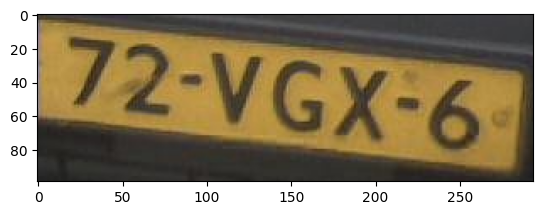

In [4]:
# Localization
start = time.time()
plates = Localization.plate_detection(img)
end = time.time()-start
print(end)
for plate in plates:
    Helpers.plotImage(plate)

0.005998849868774414


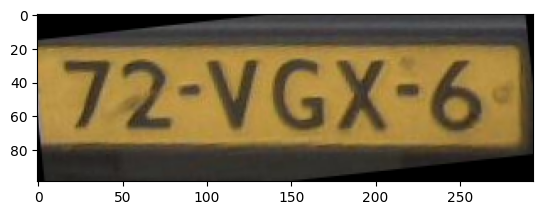

In [5]:
# Rotation
start = time.time()
plate = plates[0]
rotated = plate_rotation.rotation_pipeline(plate)
end = time.time()-start
print(end)
Helpers.plotImage(rotated)

In [6]:
# Segmentation
start = time.time()
chars, dashes = Segment.segment(rotated, show=False)
end = time.time()-start
print(end)

0.003097057342529297


In [8]:
# Segmentation with contours
start = time.time()
chars = Recognize.character_segmentation(rotated)
end = time.time()-start
print(end)

0.0009980201721191406


In [14]:
# Read reference characters
start = time.time()
reference_characters: list = read_reference_characters('./dataset/Lab07-Dataset')
end = time.time()-start
print(end)

0.03579425811767578


In [15]:
# Recognize
start = time.time()
for char in chars: 
    scores, output = character_recognition.recognise_character(reference_characters, char)
    print(output)
end = time.time()-start
print(end)

7
2
v
g
x
6
0.0304105281829834
